In [80]:
# %% Cell 1: Load OULAD Processed Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

INPUT_FILE = "/Users/ravinbandara/Desktop/Ravin/EduMind/ml/models/xai_predictor/data/oulad_processed.csv"
df = pd.read_csv(INPUT_FILE)
print("=" * 60)
print("OULAD ACADEMIC RISK PREDICTION DATASET")
print("=" * 60)
print(f"Total students: {len(df):,}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\n{'='*60}")
print("FINAL RESULT DISTRIBUTION")
print(f"{'='*60}")
for result in df["final_result"].value_counts().sort_values(ascending=False).items():
    print(f"{result[0]}: {result[1]:,} ({result[1]/len(df)*100:.1f}%)")

OULAD ACADEMIC RISK PREDICTION DATASET
Total students: 32,593

Dataset shape: (32593, 19)

Columns: ['id_student', 'code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'age_band', 'final_result', 'avg_grade', 'grade_consistency', 'grade_range', 'num_assessments', 'assessment_completion_rate', 'studied_credits', 'num_of_prev_attempts', 'low_performance', 'low_engagement', 'has_previous_attempts', 'is_at_risk']

First 5 rows:
   id_student code_module code_presentation gender                region  \
0       11391         AAA             2013J      M   East Anglian Region   
1       28400         AAA             2013J      F              Scotland   
2       30268         AAA             2013J      F  North Western Region   
3       31604         AAA             2013J      F     South East Region   
4       32885         AAA             2013J      F  West Midlands Region   

       highest_education age_band final_result  avg_grade  grade_consistency  \
0       HE 

ACADEMIC RISK ANALYSIS


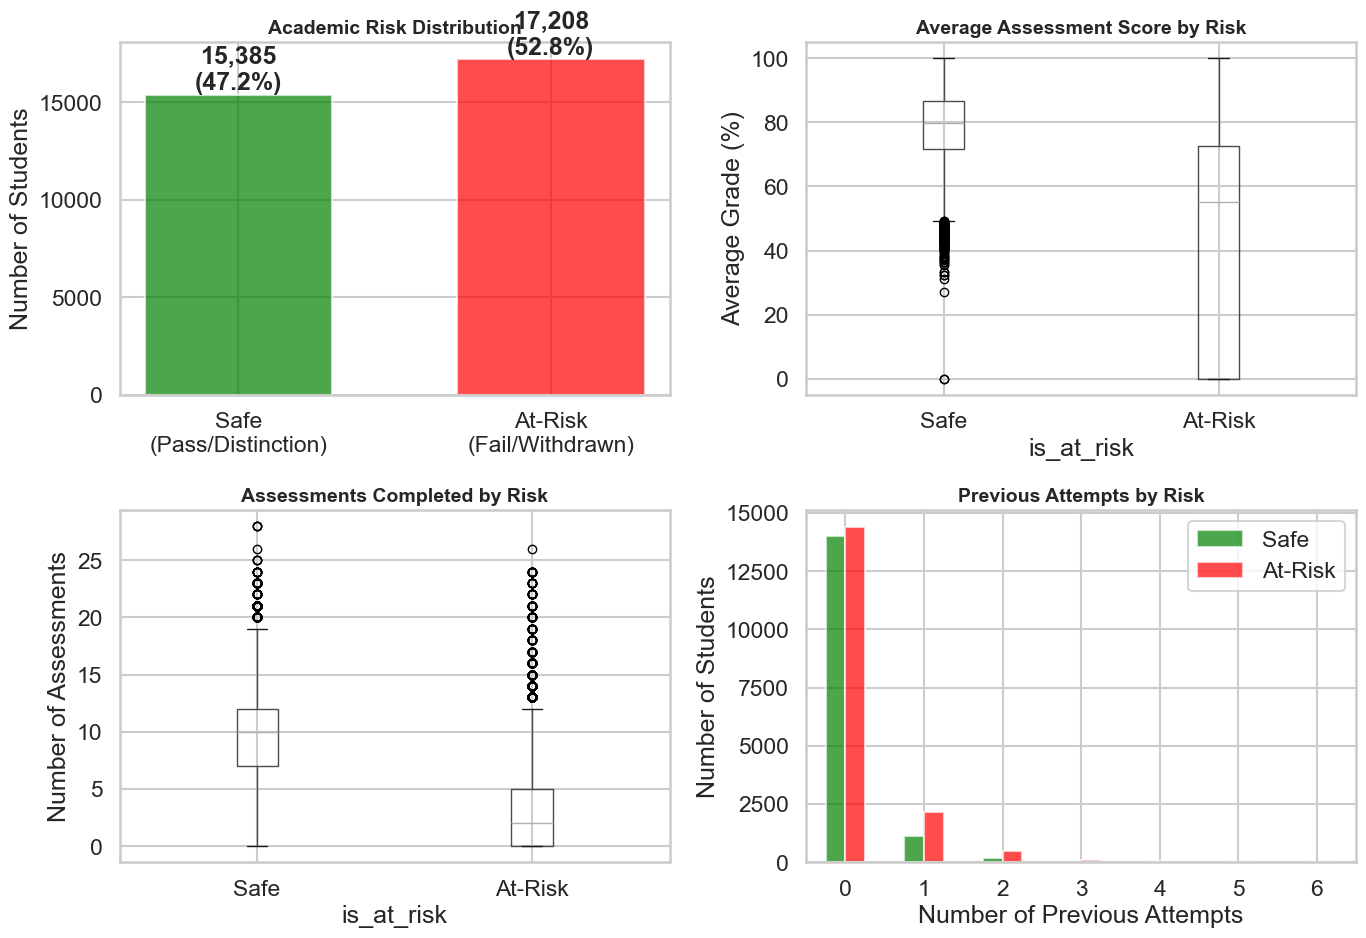


RISK STATISTICS
Safe Students: 15,385 (47.2%)
At-Risk Students: 17,208 (52.8%)

PERFORMANCE BY RISK CATEGORY

Safe Students (n=15,385):
  Average Grade: 78.24%
  Avg Assessments: 9.6
  Avg Credits: 74
  With Previous Attempts: 1,380 (9.0%)

At-Risk Students (n=17,208):
  Average Grade: 43.17%
  Avg Assessments: 3.4
  Avg Credits: 85
  With Previous Attempts: 2,792 (16.2%)


In [81]:
# %% Cell 2: Risk Distribution and Visualization
print("=" * 60)
print("ACADEMIC RISK ANALYSIS")
print("=" * 60)
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Risk distribution
ax1 = axes[0, 0]
risk_counts = df["is_at_risk"].value_counts().sort_index()
categories = ["Safe\n(Pass/Distinction)", "At-Risk\n(Fail/Withdrawn)"]
counts = [risk_counts.get(0, 0), risk_counts.get(1, 0)]
bars = ax1.bar(categories, counts, color=["green", "red"], alpha=0.7, width=0.6)
ax1.set_title("Academic Risk Distribution", fontsize=14, fontweight="bold")
ax1.set_ylabel("Number of Students")
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{int(height):,}\n({height/len(df)*100:.1f}%)",
        ha="center",
        va="bottom",
        fontweight="bold",
    )
# Average grade by risk
ax2 = axes[0, 1]
df.boxplot(column="avg_grade", by="is_at_risk", ax=ax2)
ax2.set_xticklabels(["Safe", "At-Risk"])
ax2.set_title("Average Assessment Score by Risk", fontsize=14, fontweight="bold")
ax2.set_ylabel("Average Grade (%)")
plt.suptitle("")
# Number of assessments by risk
ax3 = axes[1, 0]
df.boxplot(column="num_assessments", by="is_at_risk", ax=ax3)
ax3.set_xticklabels(["Safe", "At-Risk"])
ax3.set_title("Assessments Completed by Risk", fontsize=14, fontweight="bold")
ax3.set_ylabel("Number of Assessments")
plt.suptitle("")
# Previous attempts by risk
ax4 = axes[1, 1]
prev_attempts = (
    df.groupby(["is_at_risk", "num_of_prev_attempts"]).size().unstack(fill_value=0)
)
prev_attempts.T.plot(kind="bar", ax=ax4, color=["green", "red"], alpha=0.7)
ax4.set_title("Previous Attempts by Risk", fontsize=14, fontweight="bold")
ax4.set_xlabel("Number of Previous Attempts")
ax4.set_ylabel("Number of Students")
ax4.legend(["Safe", "At-Risk"])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()
print(f"\n{'='*60}")
print("RISK STATISTICS")
print(f"{'='*60}")
print(
    f"Safe Students: {sum(df['is_at_risk']==0):,} ({sum(df['is_at_risk']==0)/len(df)*100:.1f}%)"
)
print(
    f"At-Risk Students: {sum(df['is_at_risk']==1):,} ({sum(df['is_at_risk']==1)/len(df)*100:.1f}%)"
)
print(f"\n{'='*60}")
print("PERFORMANCE BY RISK CATEGORY")
print(f"{'='*60}")
for risk_level in [0, 1]:
    category_name = "Safe" if risk_level == 0 else "At-Risk"
    subset = df[df["is_at_risk"] == risk_level]
    print(f"\n{category_name} Students (n={len(subset):,}):")
    print(f"  Average Grade: {subset['avg_grade'].mean():.2f}%")
    print(f"  Avg Assessments: {subset['num_assessments'].mean():.1f}")
    print(f"  Avg Credits: {subset['studied_credits'].mean():.0f}")
    print(
        f"  With Previous Attempts: {subset['has_previous_attempts'].sum():,} ({subset['has_previous_attempts'].mean()*100:.1f}%)"
    )

In [82]:
# %% Cell 3: Academic Feature Selection
print("=" * 60)
print("ACADEMIC PERFORMANCE FEATURES")
print("=" * 60)
# Academic performance features only (no engagement)
feature_cols = [
    "avg_grade",  # Average assessment score
    "grade_consistency",  # Performance consistency
    "grade_range",  # Score variability
    "num_assessments",  # Assessments completed
    "assessment_completion_rate",  # Completion rate
    "studied_credits",  # Course credits
    "num_of_prev_attempts",  # Previous failures
    "low_performance",  # Binary: low grades
    "low_engagement",  # Binary: low completion
    "has_previous_attempts",  # Binary: has failed before
]
print(f"\nTotal Features: {len(feature_cols)}")
print("\nFeature List (Academic Performance Only):")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")
print(f"\n{'='*60}")
print("FEATURE STATISTICS")
print(f"{'='*60}")
print(df[feature_cols].describe().round(2))
# Check for missing values
print(f"\n{'='*60}")
print("DATA QUALITY CHECK")
print(f"{'='*60}")
missing = df[feature_cols].isnull().sum()
if missing.sum() > 0:
    print("Missing values found:")
    print(missing[missing > 0])
else:
    print("✓ No missing values in features")

ACADEMIC PERFORMANCE FEATURES

Total Features: 10

Feature List (Academic Performance Only):
   1. avg_grade
   2. grade_consistency
   3. grade_range
   4. num_assessments
   5. assessment_completion_rate
   6. studied_credits
   7. num_of_prev_attempts
   8. low_performance
   9. low_engagement
  10. has_previous_attempts

FEATURE STATISTICS
       avg_grade  grade_consistency  grade_range  num_assessments  \
count   32593.00           32593.00     32593.00         32593.00   
mean       59.72              89.61        27.87             6.35   
std        31.33               8.89        23.65             5.08   
min         0.00              30.00         0.00             0.00   
25%        50.29              84.07         1.00             2.00   
50%        71.29              90.21        26.00             6.00   
75%        82.22              99.29        43.00            11.00   
max       100.00             100.00       100.00            28.00   

       assessment_completion_rat

In [83]:
# %% Cell 4: Train-Test Split
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df["is_at_risk"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)
print(f"Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
print("\nTraining Set Distribution:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for idx, count in train_dist.items():
    class_name = "Safe" if idx == 0 else "At-Risk"
    print(f"  {class_name}: {count:,} ({count/len(y_train)*100:.1f}%)")
print("\nTest Set Distribution:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for idx, count in test_dist.items():
    class_name = "Safe" if idx == 0 else "At-Risk"
    print(f"  {class_name}: {count:,} ({count/len(y_test)*100:.1f}%)")

TRAIN-TEST SPLIT
Training set: 26,074 samples (80.0%)
Test set: 6,519 samples (20.0%)

Training Set Distribution:
  Safe: 12,308 (47.2%)
  At-Risk: 13,766 (52.8%)

Test Set Distribution:
  Safe: 3,077 (47.2%)
  At-Risk: 3,442 (52.8%)


In [84]:
# %% Cell 5: Train XGBoost Model with Class Weights
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight

print("=" * 60)
print("TRAINING BINARY CLASSIFICATION MODEL")
print("=" * 60)
# Compute class weights (dataset is balanced, but good practice)
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[int(y)] for y in y_train])
print("\nClass Weights:")
print(f"  Safe (0): {class_weights[0]:.3f}")
print(f"  At-Risk (1): {class_weights[1]:.3f}")
# Train model
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    random_state=42,
    eval_metric="logloss",
)
print("\nTraining model...")
model.fit(X_train, y_train, sample_weight=sample_weights, verbose=False)
print("\n✓ Model training complete!")

TRAINING BINARY CLASSIFICATION MODEL

Class Weights:
  Safe (0): 1.059
  At-Risk (1): 0.947

Training model...

✓ Model training complete!



MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

        Safe       0.81      0.92      0.86      3077
     At-Risk       0.92      0.81      0.86      3442

    accuracy                           0.86      6519
   macro avg       0.86      0.86      0.86      6519
weighted avg       0.87      0.86      0.86      6519


Confusion Matrix:
                Pred Safe  Pred At-Risk
Actual Safe          2819           258
Actual At-Risk        643          2799

ROC-AUC Score: 0.943


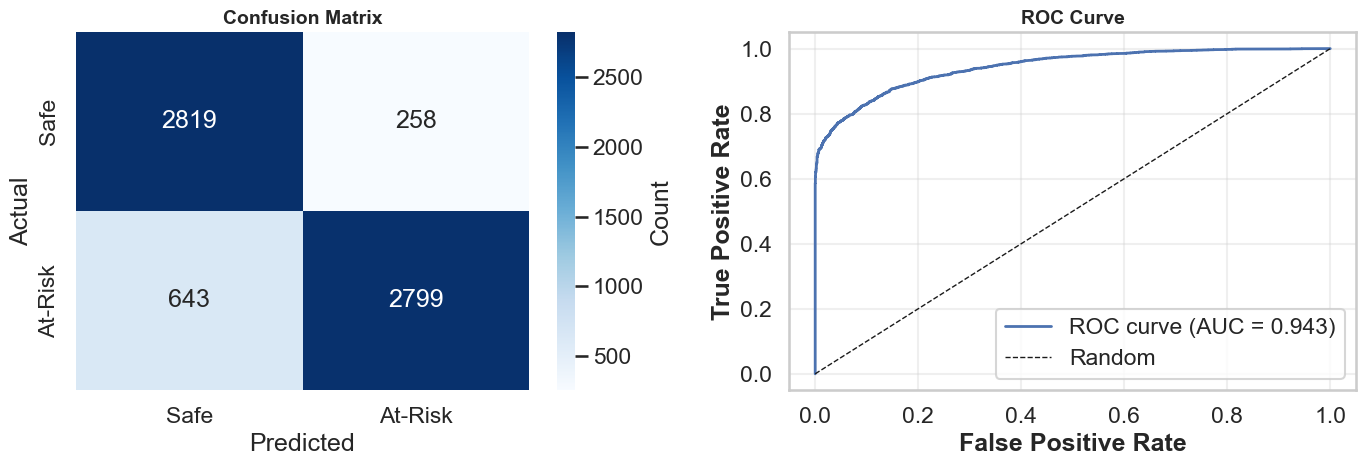

In [85]:
# %% Cell 6: Model Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print("\n" + "=" * 60)
print("MODEL PERFORMANCE")
print("=" * 60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Safe", "At-Risk"]))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, columns=["Pred Safe", "Pred At-Risk"], index=["Actual Safe", "Actual At-Risk"]
)
print(cm_df)
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.3f}")
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Confusion Matrix Heatmap
ax1 = axes[0]
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Safe", "At-Risk"],
    yticklabels=["Safe", "At-Risk"],
    ax=ax1,
    cbar_kws={"label": "Count"},
)
ax1.set_title("Confusion Matrix", fontsize=14, fontweight="bold")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")
# ROC Curve
ax2 = axes[1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, linewidth=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
ax2.plot([0, 1], [0, 1], "k--", linewidth=1, label="Random")
ax2.set_xlabel("False Positive Rate", fontweight="bold")
ax2.set_ylabel("True Positive Rate", fontweight="bold")
ax2.set_title("ROC Curve", fontsize=14, fontweight="bold")
ax2.legend()
ax2.grid(alpha=0.3)
plt.tight_layout()
plt.show()

SHAP ANALYSIS

Creating SHAP explainer...
Calculating SHAP values (this may take a few minutes for 32K students)...


 96%|=================== | 6275/6519 [00:26<00:01]       

✓ SHAP analysis complete!


/var/folders/02/rrd6_rfn3q114_xs7wcnz__00000gn/T/ipykernel_22837/956001424.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=feature_cols, show=False)


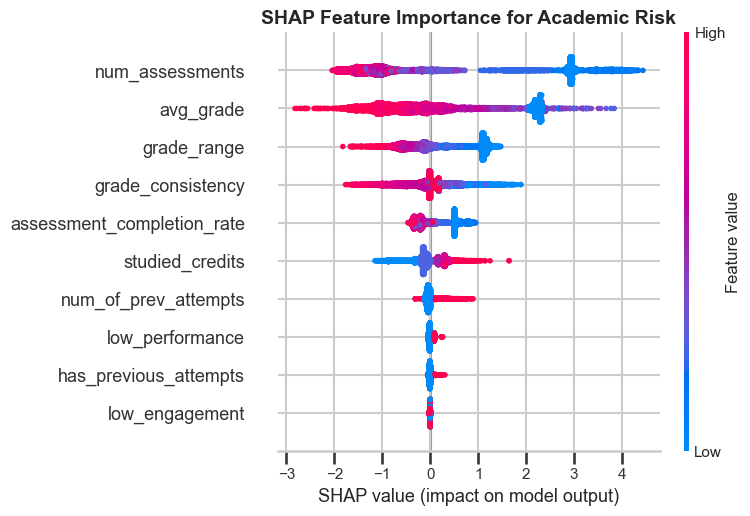

/var/folders/02/rrd6_rfn3q114_xs7wcnz__00000gn/T/ipykernel_22837/956001424.py:20: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=feature_cols, plot_type="bar", show=False)


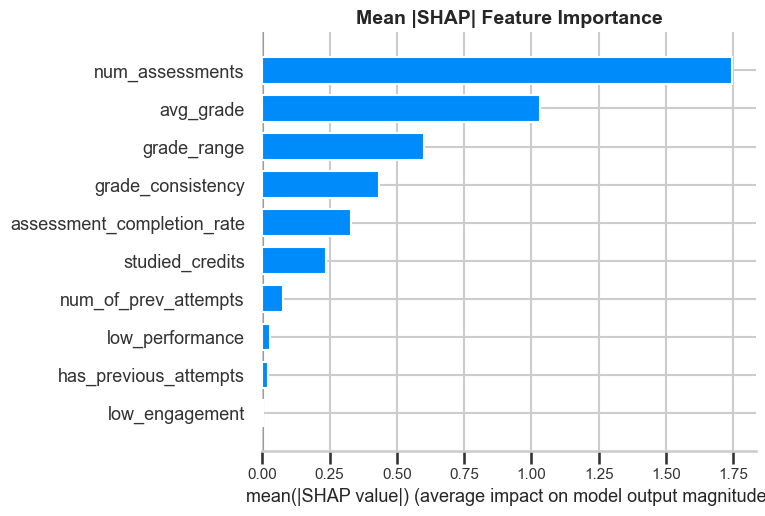

In [86]:
# %% Cell 7: SHAP Feature Importance
import shap

print("=" * 60)
print("SHAP ANALYSIS")
print("=" * 60)
# Create SHAP explainer
print("\nCreating SHAP explainer...")
explainer = shap.Explainer(model, X_train)
print("Calculating SHAP values (this may take a few minutes for 32K students)...")
shap_values = explainer(X_test)
print("✓ SHAP analysis complete!")
# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=feature_cols, show=False)
plt.title("SHAP Feature Importance for Academic Risk", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()
# SHAP Bar Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, X_test, feature_names=feature_cols, plot_type="bar", show=False
)
plt.title("Mean |SHAP| Feature Importance", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [88]:
# %% Cell 8: Personalized Academic Recommendation System
def generate_academic_guidance(
    student_idx, model, X_test, y_test, shap_values, df_test
):
    """
    Generate personalized academic recommendations based on OULAD data
    """
    # Get student data
    student_features = X_test.iloc[[student_idx]]
    student_values = X_test.iloc[student_idx]
    predicted_risk = model.predict(student_features)[0]
    probabilities = model.predict_proba(student_features)[0]

    # Get SHAP values
    student_shap = shap_values.values[student_idx]

    # Get additional info
    student_info = df_test.iloc[student_idx]

    risk_names = {0: "Safe", 1: "At-Risk"}

    print("=" * 70)
    print(f"ACADEMIC GUIDANCE REPORT - Student #{student_idx}")
    print("=" * 70)

    print(f"\n📊 ACADEMIC RISK ASSESSMENT:")
    print(f"   Risk Level: {risk_names[predicted_risk]}")
    print(f"   Confidence: Safe={probabilities[0]:.1%}, At-Risk={probabilities[1]:.1%}")
    print(f"   Actual Result: {student_info['final_result']}")

    # Top academic factors
    print(f"\n🔍 TOP ACADEMIC FACTORS:")
    feature_importance = list(zip(feature_cols, student_shap, student_values))
    feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

    for i, (feature, shap_val, value) in enumerate(feature_importance[:5], 1):
        direction = "⬆ increasing" if shap_val > 0 else "⬇ decreasing"
        print(f"   {i}. {feature}: {value:.2f} ({direction} risk)")

    # Academic recommendations
    print(f"\n💡 PERSONALIZED ACADEMIC RECOMMENDATIONS:")

    if predicted_risk == 1:  # At-Risk
        print("   🚨 ACADEMIC INTERVENTION REQUIRED")
        print("   Your performance indicates high dropout risk:")

        if student_values["avg_grade"] < 40:
            print(
                f"   • 📉 Low average grade ({student_values['avg_grade']:.1f}%) - Seek immediate tutoring"
            )
        elif student_values["avg_grade"] < 60:
            print(
                f"   • 📊 Below-average grade ({student_values['avg_grade']:.1f}%) - Improve study strategies"
            )

        if student_values["num_assessments"] < 5:
            print(
                f"   • 📝 Only {student_values['num_assessments']:.0f} assessments completed - Submit all assignments"
            )

        if student_values["has_previous_attempts"] == 1:
            print(f"   • 🔄 Previous course failures detected - Address knowledge gaps")

        if student_values["low_performance"] == 1:
            print(
                f"   • ⚠️ Consistently low performance - Consider course load reduction"
            )

        print("\n   📚 ACTION PLAN:")
        print("   • Contact academic advisor immediately")
        print("   • Attend all tutoring sessions")
        print("   • Complete all remaining assessments")
        print("   • Form study groups with high-performing peers")
        print("   • Review course materials systematically")

    else:  # Safe
        print("   ✅ STRONG ACADEMIC PERFORMANCE")
        print("   Your performance indicates success:")

        print(f"   • Current average: {student_values['avg_grade']:.1f}%")
        print(f"   • Assessments completed: {student_values['num_assessments']:.0f}")

        print("\n   🎯 ENHANCEMENT GOALS:")
        if student_values["avg_grade"] < 80:
            print("   • Aim for distinction level (80%+)")
        print("   • Maintain consistent performance")
        print("   • Help struggling classmates")
        print("   • Explore advanced topics")

    print("\n" + "=" * 70)
    return predicted_risk


# Test recommendations
print("=" * 70)
print("PERSONALIZED ACADEMIC GUIDANCE EXAMPLES")
print("=" * 70)
# Get test dataframe
df_test = df.iloc[X_test.index].reset_index(drop=True)
# At-Risk Student
at_risk_students = [i for i, pred in enumerate(model.predict(X_test)) if pred == 1]
if at_risk_students:
    print("\n📌 EXAMPLE 1: AT-RISK STUDENT\n")
    generate_academic_guidance(
        at_risk_students[0], model, X_test, y_test, shap_values, df_test
    )
# Safe Student
safe_students = [i for i, pred in enumerate(model.predict(X_test)) if pred == 0]
if safe_students:
    print("\n📌 EXAMPLE 2: SAFE STUDENT\n")
    generate_academic_guidance(
        safe_students[0], model, X_test, y_test, shap_values, df_test
    )
print("\n" + "=" * 70)
print("✅ ACADEMIC GUIDANCE SYSTEM READY")
print("=" * 70)
print(f"\nSystem trained on {len(X_train):,} students")
print(f"Tested on {len(X_test):,} students")
print(f"Model accuracy: {(y_pred == y_test).mean()*100:.1f}%")
print("\nGenerate guidance for any student:")
print(
    "generate_academic_guidance(student_index, model, X_test, y_test, shap_values, df_test)"
)

PERSONALIZED ACADEMIC GUIDANCE EXAMPLES

📌 EXAMPLE 1: AT-RISK STUDENT

ACADEMIC GUIDANCE REPORT - Student #1

📊 ACADEMIC RISK ASSESSMENT:
   Risk Level: At-Risk
   Confidence: Safe=0.1%, At-Risk=99.9%
   Actual Result: Withdrawn

🔍 TOP ACADEMIC FACTORS:
   1. num_assessments: 0.00 (⬆ increasing risk)
   2. avg_grade: 0.00 (⬆ increasing risk)
   3. grade_range: 0.00 (⬆ increasing risk)
   4. assessment_completion_rate: 0.00 (⬆ increasing risk)
   5. studied_credits: 30.00 (⬇ decreasing risk)

💡 PERSONALIZED ACADEMIC RECOMMENDATIONS:
   🚨 ACADEMIC INTERVENTION REQUIRED
   Your performance indicates high dropout risk:
   • 📉 Low average grade (0.0%) - Seek immediate tutoring
   • 📝 Only 0 assessments completed - Submit all assignments
   • ⚠️ Consistently low performance - Consider course load reduction

   📚 ACTION PLAN:
   • Contact academic advisor immediately
   • Attend all tutoring sessions
   • Complete all remaining assessments
   • Form study groups with high-performing peers
   

In [89]:
# Save Model for Deployment
import pickle
import json
import os

# Create directory for saved models
MODEL_DIR = (
    "/Users/ravinbandara/Desktop/Ravin/EduMind/ml/models/xai_predictor/saved_models"
)
os.makedirs(MODEL_DIR, exist_ok=True)

# Save XGBoost model (native format - recommended)
model_path = f"{MODEL_DIR}/academic_risk_model.json"
model.save_model(model_path)
print(f"✓ Model saved: {model_path}")

# Save as pickle (alternative)
pickle_path = f"{MODEL_DIR}/academic_risk_model.pkl"
with open(pickle_path, "wb") as f:
    pickle.dump(model, f)
print(f"✓ Pickle saved: {pickle_path}")

# Save feature names and metadata
metadata = {
    "feature_names": feature_cols,
    "model_type": "XGBClassifier",
    "classes": ["Safe", "At-Risk"],
    "accuracy": float((model.predict(X_test) == y_test).mean()),
}

metadata_path = f"{MODEL_DIR}/model_metadata.json"
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=2)
print(f"✓ Metadata saved: {metadata_path}")

✓ Model saved: /Users/ravinbandara/Desktop/Ravin/EduMind/ml/models/xai_predictor/saved_models/academic_risk_model.json
✓ Pickle saved: /Users/ravinbandara/Desktop/Ravin/EduMind/ml/models/xai_predictor/saved_models/academic_risk_model.pkl
✓ Metadata saved: /Users/ravinbandara/Desktop/Ravin/EduMind/ml/models/xai_predictor/saved_models/model_metadata.json
